In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [64]:
data=pd.read_csv("/Users/gorkaetxebarriaatutxa/Documents/PBL4/Estadistica/Datos.csv",delimiter=';')
print(data.head())

      Country  incomes  wasted
0   australia    16572      97
1     austria    18323     154
2     bahrain    14327     132
3  bangladesh     3890     116
4     belgium    19234     132


Text(0.5, 1.0, 'incomes vs wasted')

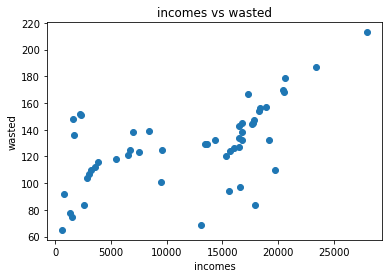

In [65]:
plt.scatter(data['incomes'],data['wasted'])
plt.xlabel('incomes')
plt.ylabel('wasted')
plt.title('incomes vs wasted')

In [66]:
x=data['incomes']
y=data['wasted']
n = np.size(x)
m_x = np.mean(x)
m_y = np.mean(y)
SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x
SS_yy= 0
for dat in data['wasted']:
    SS_yy += (dat - m_y)**2
print('n= ',n)
print('mx= ',m_x)
print('my= ',m_y)
print('Sxy= '+str(SS_xy))
print('Sxx= '+str(SS_xx))
print('Syy= '+str(SS_yy))
print('b1= '+str(b_1))
print('b0= '+str(b_0))

n=  52
mx=  11967.807692307691
my=  128.30769230769232
Sxy= 6529070.076923072
Sxx= 2747573894.0769234
Syy= 46999.07692307692
b1= 0.002376303724168475
b0= 99.86854631832944


In [67]:
#coeficiente de correlacion
coe=data['incomes'].corr(data['wasted'], method='pearson')
print('coeficiente de correlacion= '+ str(coe))

coeficiente de correlacion= 0.5745554851596285


Text(0.5, 1.0, 'incomes vs wasted')

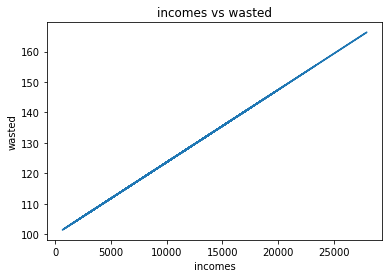

In [68]:
recta_regresion_muestral_y = b_0 + b_1 * data['incomes']
plt.plot(data['incomes'], recta_regresion_muestral_y)
plt.xlabel('incomes')
plt.ylabel('wasted')
plt.title('incomes vs wasted')

Text(0.5, 1.0, 'incomes vs wasted')

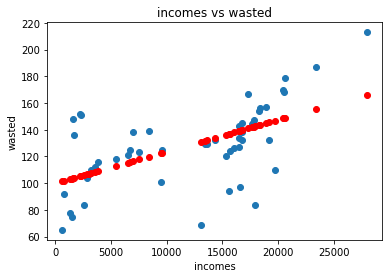

In [69]:

plt.plot(data['incomes'], recta_regresion_muestral_y,'ro')
plt.scatter(data['incomes'], data['wasted'])
plt.xlabel('incomes')
plt.ylabel('wasted')
plt.title('incomes vs wasted')

Text(0.5, 1.0, 'incomes vs wasted')

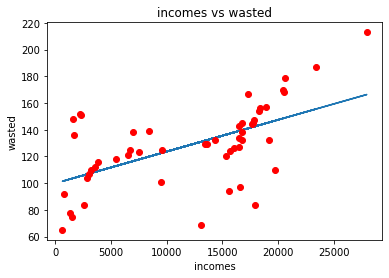

In [70]:
plt.plot(data['incomes'], recta_regresion_muestral_y,)
plt.plot(data['incomes'], data['wasted'],'ro')
plt.xlabel('incomes')
plt.ylabel('wasted')
plt.title('incomes vs wasted')

In [71]:
sse = 0
sse = SS_yy - b_1 * SS_xy #borrar si va mal
est_var = sse / (52-2)
print('SSE:', sse)
print('Estimacion de varianza:', est_var)

SSE: 31484.023383927673
Estimacion de varianza: 629.6804676785534


In [72]:
varb1 = est_var / SS_xx
varb0 = est_var * ((1/n)+((m_x)**2/SS_xx))
print('varb1:', varb1)
print('varb0:', varb0)

varb1: 2.2917690004115479e-07
varb0: 44.93388527646502


In [73]:
#La suma de residuos debe de dar 0
residuos = []
suma_residuales = 0
for var_y, dat in zip(recta_regresion_muestral_y, data['wasted']):
    residuos.append(dat - var_y)
suma_residuos = np.sum(residuos)
print('Suma de residuos:', suma_residuos)

#Las dos sumas deben de ser iguales
suma_valores_recta = np.sum(recta_regresion_muestral_y)
suma_valores_observados = np.sum(data['wasted'])
print('Datos de la recta:', recta_regresion_muestral_y)
print('Datos en crudo:', data['wasted'])

Suma de residuos: -9.805489753489383e-13
Datos de la recta: 0     139.248652
1     143.409559
2     133.913850
3     109.112368
4     145.574372
5     107.104391
6     122.593139
7     148.998626
8     136.363819
9     119.915045
10    139.179739
11    139.177363
12    101.769589
13    141.924370
14    148.734856
15    122.509968
16    144.958909
17    105.918616
18    142.090711
19    136.860466
20    105.448107
21    108.473142
22    115.414325
23    139.179739
24    132.250437
25    142.603992
26    139.745299
27    103.433002
28    115.896715
29    143.566396
30    117.797758
31    131.844089
32    112.933464
33    146.795792
34    141.038008
35    103.855984
36    137.124236
37    103.618354
38    138.122284
39    155.607126
40    101.417896
41    139.754804
42    130.993372
43    116.502672
44    139.633613
45    107.420440
46    142.394878
47    106.681409
48    148.480592
49    166.362277
50    105.186714
51    103.064675
Name: incomes, dtype: float64
Datos en crudo: 0      97


In [74]:
#La suma de los residuos ponderados por los valores de x debe de ser 0

suma_residuos_ponderados_x=np.sum(data['incomes']*residuos)
print('Suma de residuos ponderados por x:', suma_residuos_ponderados_x)
#La suma de los residuos ponderados por los valores de la y de la recta de regresion debe de ser 0

suma_residuos_ponderados_y=np.sum(recta_regresion_muestral_y*residuos)
print('Suma de residuos ponderados por y', suma_residuos_ponderados_y)


Suma de residuos ponderados por x: -5.515175871551037e-09
Suma de residuos ponderados por y -1.0413714335300028e-10


In [75]:
tinv = 2.0086
r=SS_xy/np.sqrt(SS_xx*SS_yy)
t_student=r*np.sqrt(n-2)/np.sqrt(1-r**2)
if(t_student>r):
    print("Hipotesis nula rechazada")
else:
    print("Hipotesis nula aceptada")
print("r= ",r)
print("tinv= ",tinv)
print("t de student= ",t_student)
    

Hipotesis nula rechazada
r=  0.5745554851596281
tinv=  2.0086
t de student=  4.963825757804574


In [76]:
#Intervalo de confianza para beta 1 beta +- t-student de alfa/2 con n-2 grados * s/sqrt(SSE)
#Intervalo de confianza del 95%, alfa de 0,05 y el tinv(0.975, 50) = 2.0086
s = np.sqrt(est_var)
print(s)
lim_inf_beta1 = b_1 - tinv*(s/np.sqrt(SS_xx))
lim_sup_beta1 = b_1 + tinv*(s/np.sqrt(SS_xx))
print('\n', 'Limite inferior de beta1:', lim_inf_beta1)
print('Limite superior de beta1:', lim_sup_beta1)
print('Limites de beta1:', lim_inf_beta1, '<', b_1, '<', lim_sup_beta1)
#Intervalo de confianza para beta 0 beta+- t-student de alfa/2 con n-2 grados * s * sqrt(1/n + mean(x)**2/sxx)
lim_inf_beta0 = b_0 - tinv*s*(np.sqrt(1/100+(np.mean(data['incomes'])**2/SS_xx)))
lim_sup_beta0 = b_0 + tinv*s*(np.sqrt(1/100+(np.mean(data['incomes'])**2/SS_xx)))
print('\n','Limite inferior de beta0:', lim_inf_beta0)
print('Limite superior de beta0:', lim_sup_beta0)
print('Limites de beta0:', lim_inf_beta0, '<', b_0, '<', lim_sup_beta0)

25.09343475251153

 Limite inferior de beta1: 0.0014147382113459935
Limite superior de beta1: 0.0033378692369909566
Limites de beta1: 0.0014147382113459935 < 0.002376303724168475 < 0.0033378692369909566

 Limite inferior de beta0: 87.3053273013018
Limite superior de beta0: 112.43176533535707
Limites de beta0: 87.3053273013018 < 99.86854631832944 < 112.43176533535707


In [77]:
#Intervalo de estimacion para la respuesta media
#Utilizaremos el tin anteriormente utilizado tinv(0.975, 98) = 1.9845

lim_inf_rep_med = []
lim_sup_rep_med = []

for var_x in data['incomes']:
    val_x = b_0+b_1*var_x
    lim_inf_rep_med.append((val_x) - (tinv * s * np.sqrt((1/n) + (var_x - m_x)**2/SS_xx)))
for var_x in data['incomes']:
    val_x = b_0+b_1*var_x
    lim_sup_rep_med.append((val_x) + (tinv * s * np.sqrt((1/n) + (var_x - m_x)**2/SS_xx)))

#Intervalo de prediccion para una observacion futura
lim_inf_obs_fut = []
lim_sup_obs_fut = []

for var_y, var_x in zip(recta_regresion_muestral_y, data['incomes']):
    lim_inf_obs_fut.append((var_y) - (tinv * s * np.sqrt(1 + (1/n) + (var_x - m_x)**2/SS_xx)))
    
for var_y, var_x in zip(recta_regresion_muestral_y, data['incomes']):
    lim_sup_obs_fut.append((var_y) + (tinv * s * np.sqrt(1 + (1/n) + (var_x - m_x)**2/SS_xx)))
dist_lim = []
for inf, sup in zip(lim_inf_obs_fut, lim_sup_obs_fut):
    dist_lim.append(sup-inf)
print (dist_lim)

[102.15447617035841, 102.50126582186833, 101.87109572807033, 102.94883104299555, 102.72489304183102, 103.20654884993156, 101.87504040519025, 103.13841609806019, 101.97864008414427, 101.99641398375655, 102.14965722323967, 102.14949159168589, 104.01155581233891, 102.36490550831087, 103.1039736623456, 101.87811820768309, 102.65832289244662, 103.37043602551456, 102.37948517415941, 102.00512553497038, 103.43786068626176, 103.02816269933797, 102.30354371360718, 102.14965722323967, 101.82002227761308, 102.4255761001453, 102.19009923092908, 103.74194538201566, 102.26446239436048, 102.51647753800393, 102.12483213920927, 101.81024717464612, 102.527781494279, 102.86402065512078, 102.29016893589989, 103.67606308211398, 102.0198330142083, 103.712941686574, 102.07950394509601, 104.14052675607303, 104.07069979482264, 102.19079630844425, 101.7932197468607, 102.21746179278995, 102.18195159313024, 103.1643302654727, 102.40659741911128, 103.26401624556321, 103.07117999708834, 106.32786410657621, 103.4759

In [78]:
lim_inf_rep_med.sort();
lim_sup_rep_med.sort();
lim_inf_obs_fut.sort();
lim_sup_obs_fut.sort();

Text(0.5, 1.0, 'Desechos de comida segun los ingresos')

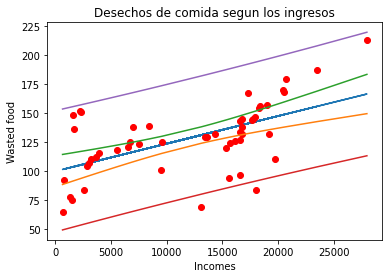

In [79]:
plt.plot(data['incomes'], recta_regresion_muestral_y)
plt.plot(data['incomes'], data['wasted'], 'ro')
plt.plot(data['incomes'].sort_values(), lim_inf_rep_med)
plt.plot(data['incomes'].sort_values(), lim_sup_rep_med)
plt.plot(data['incomes'].sort_values(), lim_inf_obs_fut)
plt.plot(data['incomes'].sort_values(), lim_sup_obs_fut)
plt.xlabel('Incomes')
plt.ylabel('Wasted food')
plt.title('Desechos de comida segun los ingresos')

In [80]:
print("inferencia de la comida desperdiciada para una riqueza de 5000= ",b_0 + b_1 * 5000)
print("inferencia de la comida desperdiciada para una riqueza de 20000= ",b_0 + b_1 * 20000)
print("inferencia de la comida desperdiciada para una riqueza de 30000= ",b_0 + b_1 * 30000)
print("inferencia de la comida desperdiciada para una riqueza de 50000= ",b_0 + b_1 * 50000)

inferencia de la comida desperdiciada para una riqueza de 5000=  111.7500649391718
inferencia de la comida desperdiciada para una riqueza de 20000=  147.39462080169892
inferencia de la comida desperdiciada para una riqueza de 30000=  171.1576580433837
inferencia de la comida desperdiciada para una riqueza de 50000=  218.6837325267532
